In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from positionCorrection import positionCorrection as correct
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
df = pd.read_csv('data_dwarfGroupSubhalos-OneSubhalo.csv')
df[0:10]

,Group Number,Subhalo ID,Mass at z=0,Max Mass,Max Mass Snap,Pos x,Pos y,Pos z,Vel x,Vel y,Vel z,Flag
0,7437,733315,23.355842,23.355842,135,12011.513672,26778.728516,1706.748413,-337.554932,-38.484951,58.460209,0
1,8528,746452,19.928614,19.928614,135,4030.854248,18986.419922,60106.570312,191.614456,96.981346,66.976006,0
2,9214,753872,17.846105,31.682120,101,41802.886719,202.018707,71071.953125,-373.841980,-136.683044,-108.419685,0
3,9628,758261,17.452767,17.452767,135,28660.570312,3924.725830,73031.203125,-25.281919,-188.583176,184.947113,0
4,10453,766332,15.565047,21.547843,97,11114.739258,14412.980469,38047.070312,-94.053902,-15.682342,-90.153534,0
5,10560,767369,15.125831,25.592528,95,12084.316406,50081.562500,46423.371094,-82.077942,-262.158112,430.252808,0
6,10650,768252,15.670337,15.670337,135,21679.861328,1570.594116,5046.652344,-123.062958,-4.414581,103.659035,0
7,11403,775039,14.253419,25.159332,93,57027.433594,7880.807129,35992.804688,259.983917,-245.057175,260.175079,0
8,12094,781139,13.524654,13.780361,129,71207.937500,36052.921875,2056.432617,129.136139,-226.244217,48.843884,0
9,12264,782510,13.440421,13.440421,135,69884.742188,17961.468750,71571.601562,103.125175,118.952400,60.476227,0


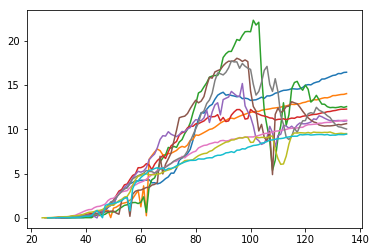

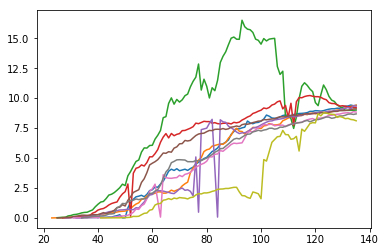

In [3]:
dfAll = pd.read_csv('data_oneSubhaloGroups.csv')
dfAll[0:10]

groupsAll = dfAll['Group Number']
subIDAll = dfAll['Subhalo ID']
subMassAll = dfAll['Mass']
snapsAll = dfAll['Snapshot']

uniqueGroups = np.unique(groupsAll)

mask1 = groupsAll == uniqueGroups[0]
subMassGroup1 = subMassAll[mask1]
snapsGroup1 = snapsAll[mask1]

[plt.plot(snapsAll[groupsAll == i],subMassAll[groupsAll == i]) for i in uniqueGroups[0:10]]
plt.show()

[plt.plot(snapsAll[groupsAll == i],subMassAll[groupsAll == i]) for i in uniqueGroups[11:20]]
plt.show()

In [4]:
groups = df['Group Number']
subID = df['Subhalo ID']
subMassz0 = df['Mass at z=0']
subMassMax = df['Max Mass']
massMaxSnap = df['Max Mass Snap']

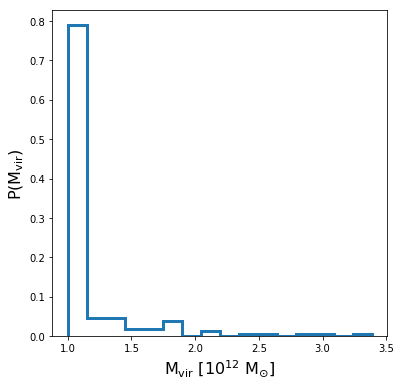

In [6]:
##################################################################
# Plotting the mass ratios between the primaries and secondaries #
##################################################################
massRatios = subMassMax/subMassz0
snaps = massMaxSnap

parameter = massRatios
weights = np.ones_like(parameter)/len(parameter)
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.hist(parameter,16,histtype='step',lw=3,weights=weights)
plt.xlabel(r'$\rm M_{vir}$ [10$^{12}$ M$\rm_{\odot}$]', fontsize=16)
plt.ylabel(r'P($\rm M_{vir}$)', fontsize=16)
plt.show()


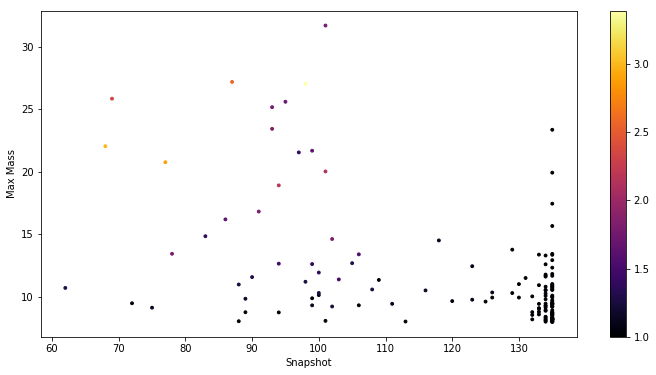

In [17]:
fig,ax = plt.subplots(figsize=(12,6))
scatterPlot = ax.scatter(massMaxSnap,subMassMax,c=subMassMax/subMassz0, cmap = 'inferno', s=8)
ax.set(xlabel=r'Snapshot', ylabel=r'Max Mass')
plt.colorbar(scatterPlot,label="")
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(0,150),np.arange(0,150),'k')
scatterPlot = ax.scatter(subhaloMassz0,subhaloMaxMass,c=subhaloMaxMassSnap, cmap = 'inferno', s=8)
ax.set(xlabel=r'Mass at z=0 [$10^{10} M_{\odot}$]', ylabel=r'Max Mass')
plt.colorbar(scatterPlot,label="Snapshot at Max Mass")
plt.show()